In [1]:
# Carga de tensorflow
#%reset
import tensorflow as tf
import random as rndm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lectura del conjunto de datos MNIST:
mnist = tf.keras.datasets.mnist # Crea un alias

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Carga los datos que están en uint8
x_train, x_test = x_train / 255.0, x_test / 255.0 # Vuelve los valores de intensidad números flotantes

In [3]:
# El objeto x_train contiene las características. Veamos cuál es la forma de este objeto:
print('Dimensiones de x_train: ',x_train.shape)
print('Dimensiones de x_testn: ',x_test.shape)

Dimensiones de x_train:  (60000, 28, 28)
Dimensiones de x_testn:  (10000, 28, 28)


In [4]:
# Veamos cuál es la clase de x_train:
print('Clase de x_train: ',type(x_train))

Clase de x_train:  <class 'numpy.ndarray'>


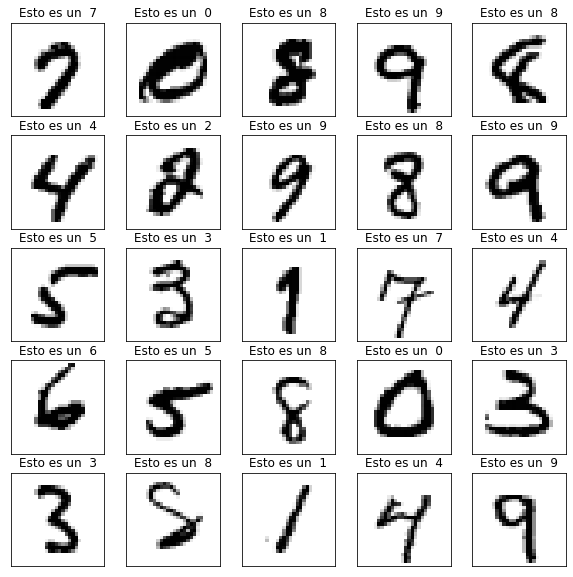

In [5]:
# Ahora veamos la representación de varios dígitos a la vez:
rndm.seed(1)
index = rndm.sample(range(len(y_train)),k=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index[i]], cmap=plt.cm.binary)
    plt.title(f"Esto es un  {y_train[index[i]]}")
plt.show()

In [6]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import  Flatten, Dense, Dropout, Softmax
from keras.optimizers import RMSprop

# Esta función define la función de pérdida con la que se entrena el modelo:
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

def plot_data(plotdata, title=""):

  for d in plotdata:

    print("\n\nModelo_lr_{} {}\n".format(d.replace("_","."), title))
    
    y_pred = plotdata[d]['model'](x_train).numpy() # Predicciones en la escala logit
    y_pred = np.argmax(y_pred,axis=1) # Predicciones de los datos. 
    cm = confusion_matrix(y_train, y_pred)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Loss vs epoch")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.plot(plotdata[d]['hist'].history['loss'])

    plt.subplot(1,2,2)
    plt.title("Accuracy vs epoch")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.plot(plotdata[d]['hist'].history['accuracy'])
    plt.show()

def confussion_mat(confdata, model, x, y):
  for d in confdata:

    print("\n\nModelo_lr_{}\n".format(d.replace("_",".")))
    
    y_pred = confdata[d][model](x).numpy() # Predicciones en la escala logit
    y_pred = np.argmax(y_pred,axis=1) # Predicciones de los datos. 

    cm = confusion_matrix(y, y_pred)

    print(cm)

#Optimización RSMprop

In [7]:
data = {
    "0_001": {"n": 0.001, "model": None, "model_p": None, "opt": None, "hist": None, "eval": None},
      "0_1": {"n":   0.1, "model": None, "model_p": None, "opt": None, "hist": None, "eval": None},
      "0_5": {"n":   0.5, "model": None, "model_p": None, "opt": None, "hist": None, "eval": None},
      "0_9": {"n":   0.9, "model": None, "model_p": None, "opt": None, "hist": None, "eval": None},
      "1_5": {"n":   1.5, "model": None, "model_p": None, "opt": None, "hist": None, "eval": None}
}

In [8]:
for d in data:
  # Crea el objeto 'model', que es una red secuencial
  data[d]['model'] = Sequential()
  # Convierte una matriz en un vector
  data[d]['model'].add(Flatten(input_shape=(28, 28))) 
  # Crea una capa de 128 neurones
  data[d]['model'].add(Dense(128, activation='relu')) 
  # Define que en cada iteración el 20% de las neuronas no cambian
  data[d]['model'].add(Dropout(0.2)) 
  # Define 10 neuronas en la capa de salida
  data[d]['model'].add(Dense(10))
  
  #Optimizador
  data[d]['opt'] = RMSprop(learning_rate=data[d]['n'])
  data[d]['model']\
  .compile(optimizer = data[d]['opt'], loss = loss_fn, metrics = ['accuracy'])

  print("\n\nModelo_lr_{}\n".format(d.replace("_",".")))

  #Entrenamiento
  data[d]['hist'] = data[d]['model'].fit(x_train, y_train, epochs=5)

  # Aquí se evalúa el modelo en el conjunto de validación:
  data[d]['eval'] = data[d]['model'].evaluate(x_test,  y_test, verbose=2)
  print("\nMetrics: \n{}\n".format(data[d]['eval']))

  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  data[d]['model_p'] = Sequential([data[d]['model'],Softmax()])



Modelo_lr_0.001

Epoch 1/5
1875/1875 [==============================] - 20s 3ms/step - loss: 0.4722 - accuracy: 0.8615
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1576 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1270 - accuracy: 0.9639
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9699
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0965 - accuracy: 0.9728
313/313 - 1s - loss: 0.1005 - accuracy: 0.9755

Metrics: 
[0.10050250589847565, 0.9754999876022339]



Modelo_lr_0.1

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.2018 - accuracy: 0.6104
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6414 - accuracy: 0.6820
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5933 - accuracy: 0.6868
Epoch 4/5
1875/1875 [==============================] -



Modelo_lr_0.001 



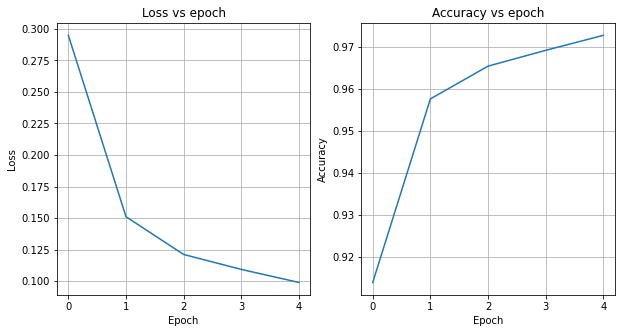



Modelo_lr_0.1 



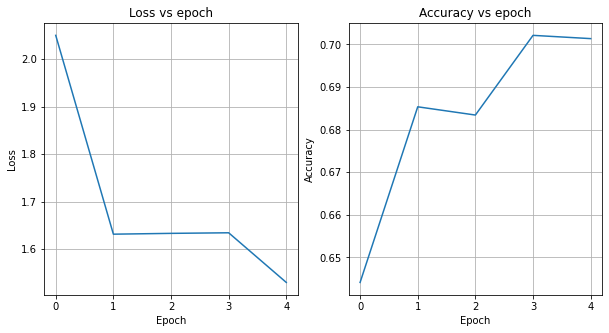



Modelo_lr_0.5 



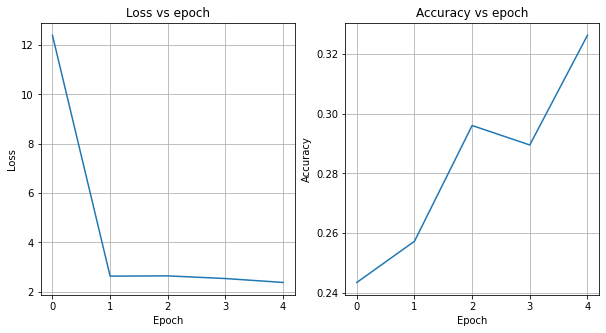



Modelo_lr_0.9 



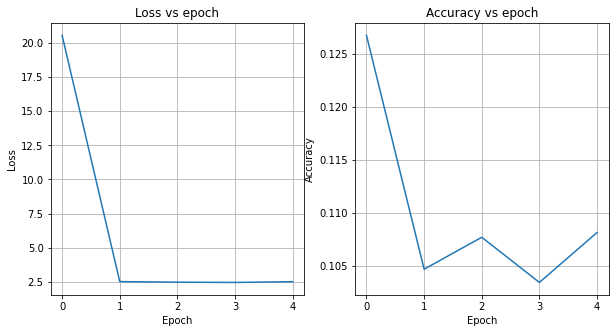



Modelo_lr_1.5 



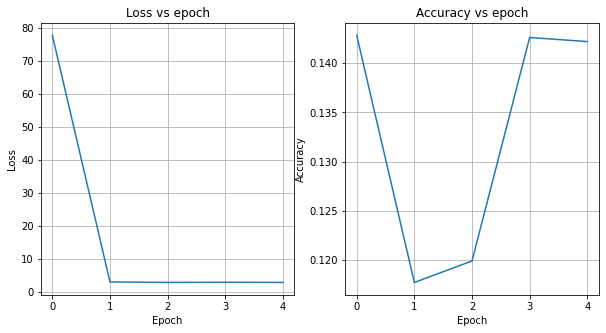



Matriz de confusión Train:



Modelo_lr_0.001

[[5892    1    4    1    2    2    7    2    9    3]
 [   1 6674   24    8    4    0    0   17   13    1]
 [  14    6 5874   11   11    2    5   28    3    4]
 [   5    6   50 5938    0   58    4   30   23   17]
 [   6   16    7    0 5721    1    5   11    6   69]
 [  12    2    5   22    4 5338   15    4    7   12]
 [  28    7    4    0    8   28 5832    0   11    0]
 [   4   11   22    2    9    2    0 6205    4    6]
 [  10   22   17   20    5   25    8   12 5711   21]
 [  11    5    2   16   22   15    1   65    4 5808]]


Modelo_lr_0.1

[[4946    0    1    4    1    3    5    0  961    2]
 [   0 6159    6    7    0    0    0    4  566    0]
 [   2    2 4583  101    3    4   11    9 1242    1]
 [   1    3   35 5083    2   31    1    7  968    0]
 [   1    6   13    2 4719    2   27    6 1056   10]
 [   3    2    6   47    6 3806   17    1 1532    1]
 [   7    4    4    1    6   45 4901    0  950    0]
 [   7    2   19   67    8    4 

In [9]:
plot_data(data)
print("\n\nMatriz de confusión Train:\n")
confussion_mat(data, "model", x_train, y_train)
print("\n\nMatriz de confusión Test:\n")
confussion_mat(data, "model", x_test, y_test)

In [10]:
confussion_mat(data, 'model', x_train, y_train)



Modelo_lr_0.001

[[5892    1    4    1    2    2    7    2    9    3]
 [   1 6674   24    8    4    0    0   17   13    1]
 [  14    6 5874   11   11    2    5   28    3    4]
 [   5    6   50 5938    0   58    4   30   23   17]
 [   6   16    7    0 5721    1    5   11    6   69]
 [  12    2    5   22    4 5338   15    4    7   12]
 [  28    7    4    0    8   28 5832    0   11    0]
 [   4   11   22    2    9    2    0 6205    4    6]
 [  10   22   17   20    5   25    8   12 5711   21]
 [  11    5    2   16   22   15    1   65    4 5808]]


Modelo_lr_0.1

[[4946    0    1    4    1    3    5    0  961    2]
 [   0 6159    6    7    0    0    0    4  566    0]
 [   2    2 4583  101    3    4   11    9 1242    1]
 [   1    3   35 5083    2   31    1    7  968    0]
 [   1    6   13    2 4719    2   27    6 1056   10]
 [   3    2    6   47    6 3806   17    1 1532    1]
 [   7    4    4    1    6   45 4901    0  950    0]
 [   7    2   19   67    8    4    0 5049 1095   14]
 [   0   

#Optimización RSMprop -- 600:100

In [11]:
x_train_600 = x_train[:600,:,:]
x_test_600 = x_test[:100,:,:]
y_train_600 = y_train[:600]
y_test_600  = y_test[:100]

In [12]:
data2 = {
    "0_001": {"n": 0.001, "model": None, "model_p": None, "opt": None, "hist": None , "eval": None},
      "0_1": {"n":   0.1, "model": None, "model_p": None, "opt": None, "hist": None , "eval": None},
      "0_5": {"n":   0.5, "model": None, "model_p": None, "opt": None, "hist": None , "eval": None},
      "0_9": {"n":   0.9, "model": None, "model_p": None, "opt": None, "hist": None , "eval": None},
      "1_5": {"n":   1.5, "model": None, "model_p": None, "opt": None, "hist": None , "eval": None}
}

In [ ]:
for d in data2:
  # Crea el objeto 'model', que es una red secuencial
  data2[d]['model'] = Sequential()
  # Convierte una matriz en un vector
  data2[d]['model'].add(Flatten(input_shape=(28, 28))) 
  # Crea una capa de 128 neurones
  data2[d]['model'].add(Dense(128, activation='relu')) 
  # Define que en cada iteración el 20% de las neuronas no cambian
  data2[d]['model'].add(Dropout(0.2)) 
  # Define 10 neuronas en la capa de salida
  data[d]['model'].add(Dense(10))
  
  #Optimizador
  data2[d]['opt'] = RMSprop(learning_rate=data2[d]['n'])
  data2[d]['model']\
  .compile(optimizer = data2[d]['opt'], loss = loss_fn, metrics = ['accuracy'])

  print("\n\nModelo_lr_{} : 600\n".format(d.replace("_",".")))

  #Entrenamiento
  data2[d]['hist'] = data2[d]['model'].fit(x_train_600, y_train_600, epochs=5)

  # Aquí se evalúa el modelo en el conjunto de validación:
  data2[d]['eval'] = data2[d]['model'].evaluate(x_test_600,  y_test_600, verbose=2)
  print("\nMetrics: \n{}\n".format(data2[d]['eval']))

  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  data2[d]['model_p'] = Sequential([data2[d]['model'],Softmax()])



Modelo_lr_0.001 : 600

Epoch 1/5
19/19 [==============================] - 1s 3ms/step - loss: 4.5105 - accuracy: 0.1907
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 3.5954 - accuracy: 0.4181
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 3.1310 - accuracy: 0.5038
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 2.7681 - accuracy: 0.4996
Epoch 5/5
19/19 [==============================] - 0s 3ms/step - loss: 2.6832 - accuracy: 0.5374
4/4 - 0s - loss: 1.9846 - accuracy: 0.7200

Metrics: 
[1.9846028089523315, 0.7200000286102295]



Modelo_lr_0.1 : 600

Epoch 1/5


In [ ]:
plot_data(data2, ": 600")
print("\n\nMatriz de confusión Train:\n")
confussion_mat(data2, "model", x_train, y_train)
print("\n\nMatriz de confusión Test:\n")
confussion_mat(data2, "model", x_test, y_test)